In [1]:
!unzip /content/derma.zip

Archive:  /content/derma.zip
  inflating: dermatology_database_1.csv  


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [4]:
data = pd.read_csv('/content/dermatology_database_1.csv')

In [5]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [35]:
data = data.replace('?', pd.NaT) # Replace '?' with NaT
data = data.fillna(0)

In [36]:
y = data['class']
X = data.drop('class',axis = 1)

In [37]:
print(y)
print(X)

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64
     erythema  scaling  ...  band_like_infiltrate  age
0           2        2  ...                     0   55
1           3        3  ...                     0    8
2           2        1  ...                     3   26
3           2        2  ...                     0   40
4           2        3  ...                     3   45
..        ...      ...  ...                   ...  ...
361         2        1  ...                     0   25
362         3        2  ...                     0   36
363         3        2  ...                     3   28
364         2        1  ...                     3   50
365         3        2  ...                     0   35

[366 rows x 34 columns]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
imputer = SimpleImputer(strategy='mean')  # Or other strategies like 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [40]:
# Create SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [42]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

SVM Accuracy: 0.9594594594594594
Random Forest Accuracy: 1.0


In [44]:
# For SVM model:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score # Importing confusion_matrix, precision_score, recall_score, and f1_score
svm_cm = confusion_matrix(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')  # Use 'weighted' for multiclass
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Confusion Matrix:\n", svm_cm)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)



SVM Confusion Matrix:
 [[29  0  0  0  0  2]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
SVM Precision: 0.9716216216216215
SVM Recall: 0.9594594594594594
SVM F1 Score: 0.9622925557136084


In [46]:
# For Random Forest model:
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("\nRandom Forest Confusion Matrix:\n", rf_cm)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)


Random Forest Confusion Matrix:
 [[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0


In [49]:
from sklearn.ensemble import IsolationForest

# Create IsolationForest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed

# Fit the model to your training data
iso_forest.fit(X_train)

# Get outlier predictions for both training and testing data
outlier_predictions_train = iso_forest.predict(X_train)
outlier_predictions_test = iso_forest.predict(X_test)

# Identify inlier indices for both training and testing data
inlier_indices_train = [i for i, prediction in enumerate(outlier_predictions_train) if prediction == 1]
inlier_indices_test = [i for i, prediction in enumerate(outlier_predictions_test) if prediction == 1]

# Remove outliers from training and testing data
X_train_no_outliers = X_train[inlier_indices_train]
y_train_no_outliers = y_train.iloc[inlier_indices_train]
X_test_no_outliers = X_test[inlier_indices_test]
y_test_no_outliers = y_test.iloc[inlier_indices_test]

In [50]:
print(outlier_predictions_train)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1]


In [51]:
print(outlier_predictions_test)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1]


In [52]:
# Create and train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_no_outliers, y_train_no_outliers)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the outlier-removed test data
svm_predictions = svm_model.predict(X_test_no_outliers)
rf_predictions = rf_model.predict(X_test_no_outliers)

# Evaluate the models
svm_accuracy = accuracy_score(y_test_no_outliers, svm_predictions)
rf_accuracy = accuracy_score(y_test_no_outliers, rf_predictions)

print("SVM Accuracy (after outlier removal):", svm_accuracy)
print("Random Forest Accuracy (after outlier removal):", rf_accuracy)



SVM Accuracy (after outlier removal): 0.9583333333333334
Random Forest Accuracy (after outlier removal): 0.9861111111111112


In [55]:
# For SVM model:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score # Importing confusion_matrix, precision_score, recall_score, and f1_score
svm_cm = confusion_matrix(y_test_no_outliers, svm_predictions)
svm_precision = precision_score(y_test_no_outliers, svm_predictions, average='weighted')  # Use 'weighted' for multiclass
svm_recall = recall_score(y_test_no_outliers, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test_no_outliers, svm_predictions, average='weighted')

print("SVM Confusion Matrix:\n", svm_cm)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)


SVM Confusion Matrix:
 [[28  0  0  0  0  2]
 [ 0  9  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
SVM Precision: 0.9708333333333332
SVM Recall: 0.9583333333333334
SVM F1 Score: 0.961229162465551


In [56]:
# For Random Forest model:
rf_cm = confusion_matrix(y_test_no_outliers, rf_predictions)
rf_precision = precision_score(y_test_no_outliers, rf_predictions, average='weighted')
rf_recall = recall_score(y_test_no_outliers, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test_no_outliers, rf_predictions, average='weighted')

print("\nRandom Forest Confusion Matrix:\n", rf_cm)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)


Random Forest Confusion Matrix:
 [[30  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
Random Forest Precision: 0.9874999999999999
Random Forest Recall: 0.9861111111111112
Random Forest F1 Score: 0.9860136452241716


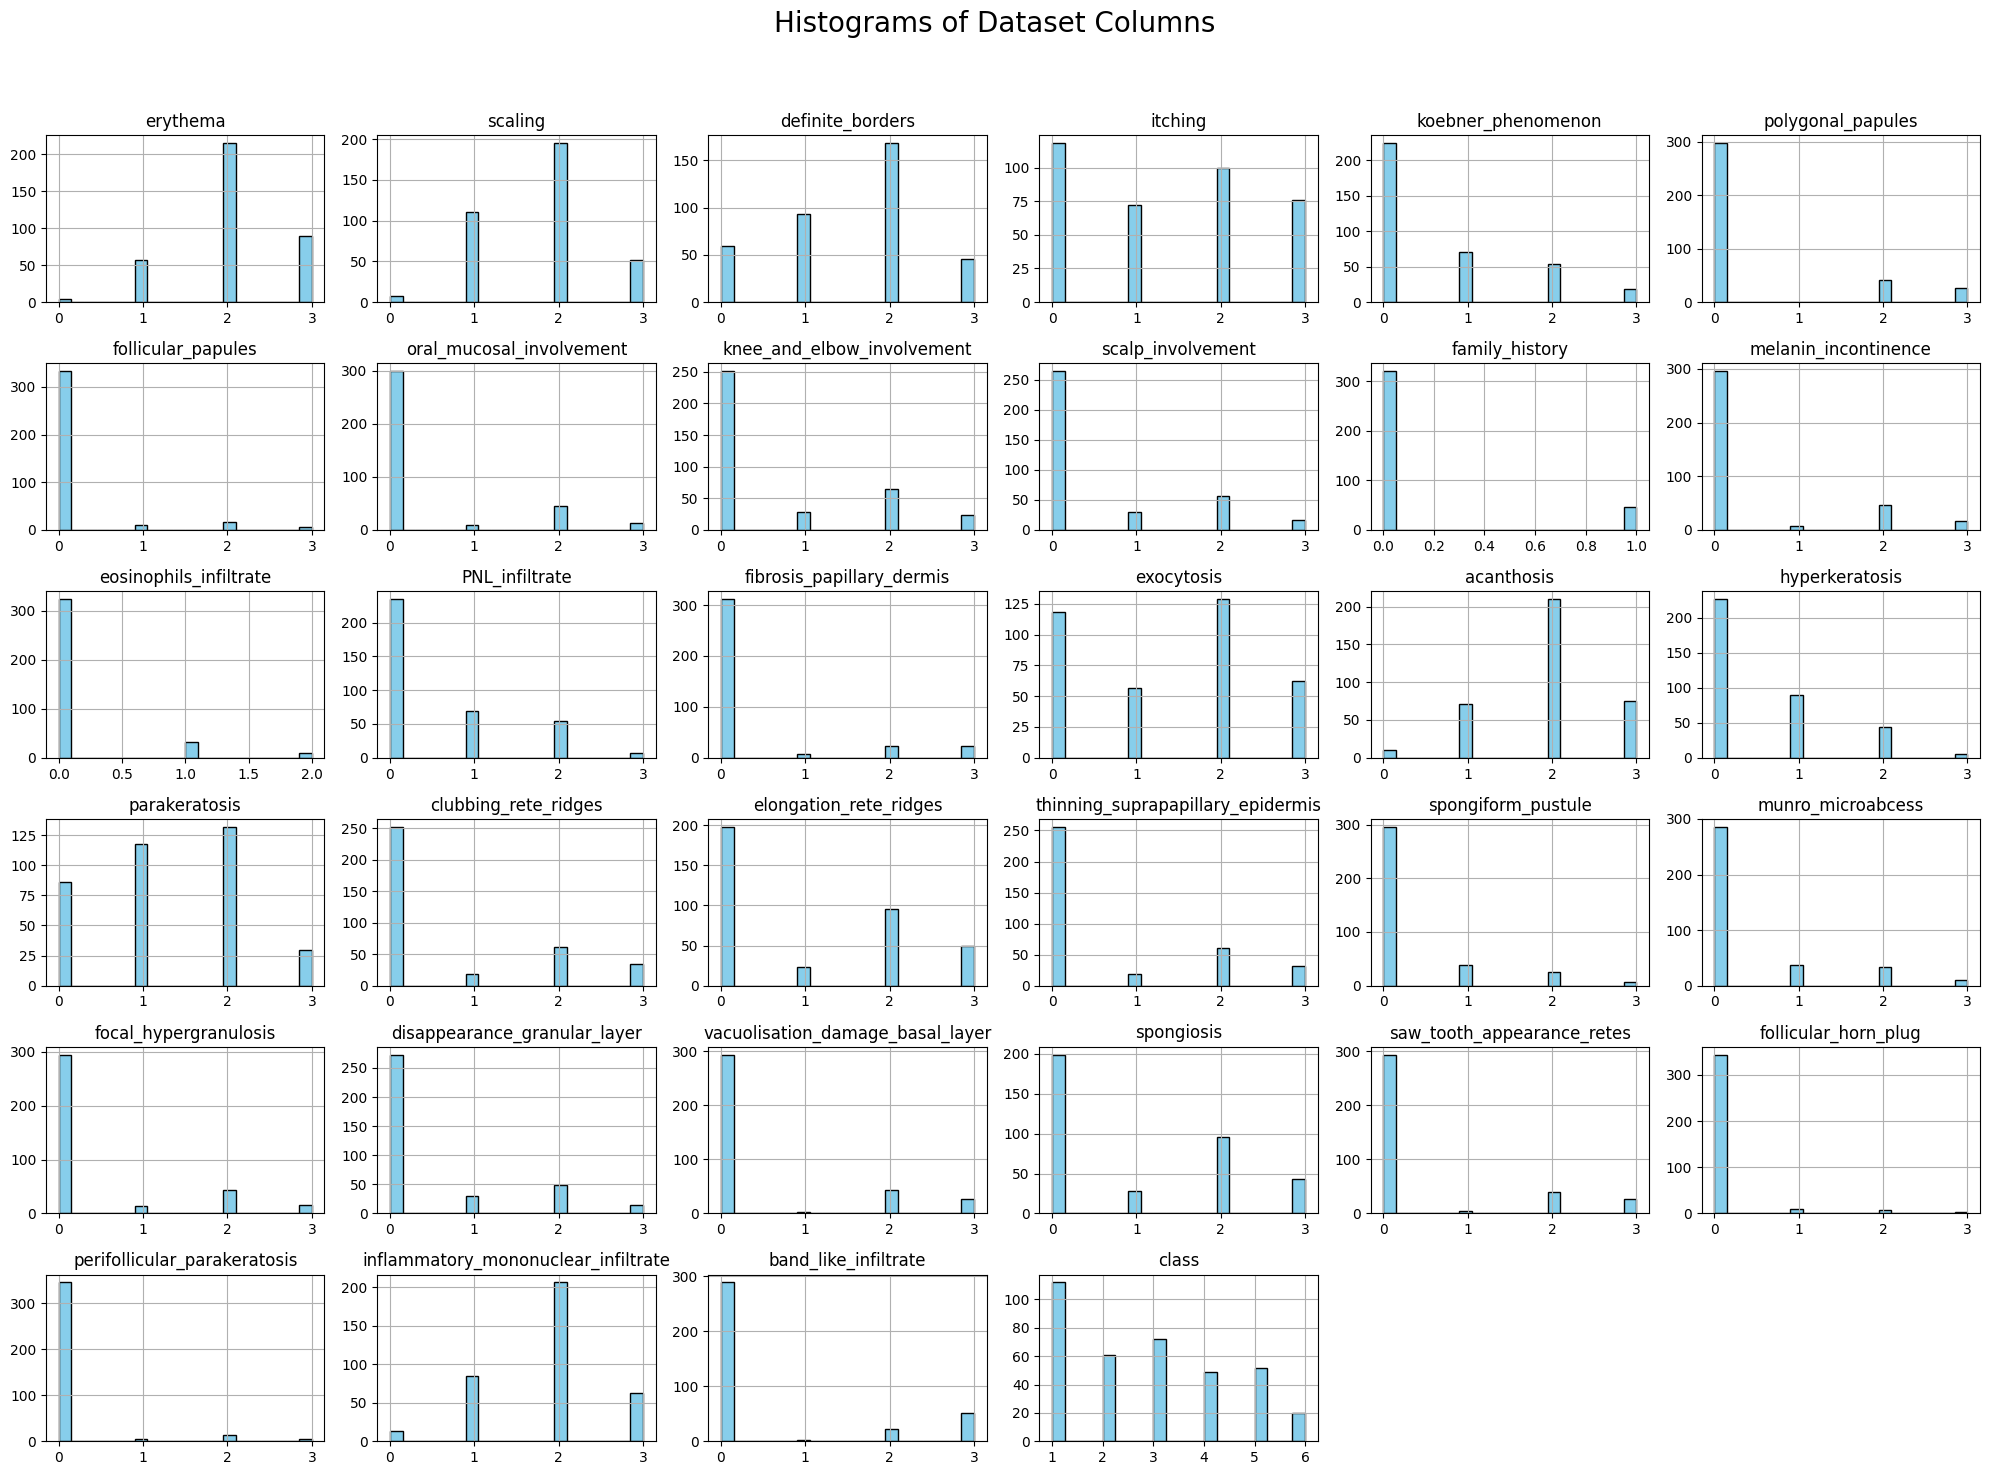

In [58]:
# Plot histograms for each column
data.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Dataset Columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


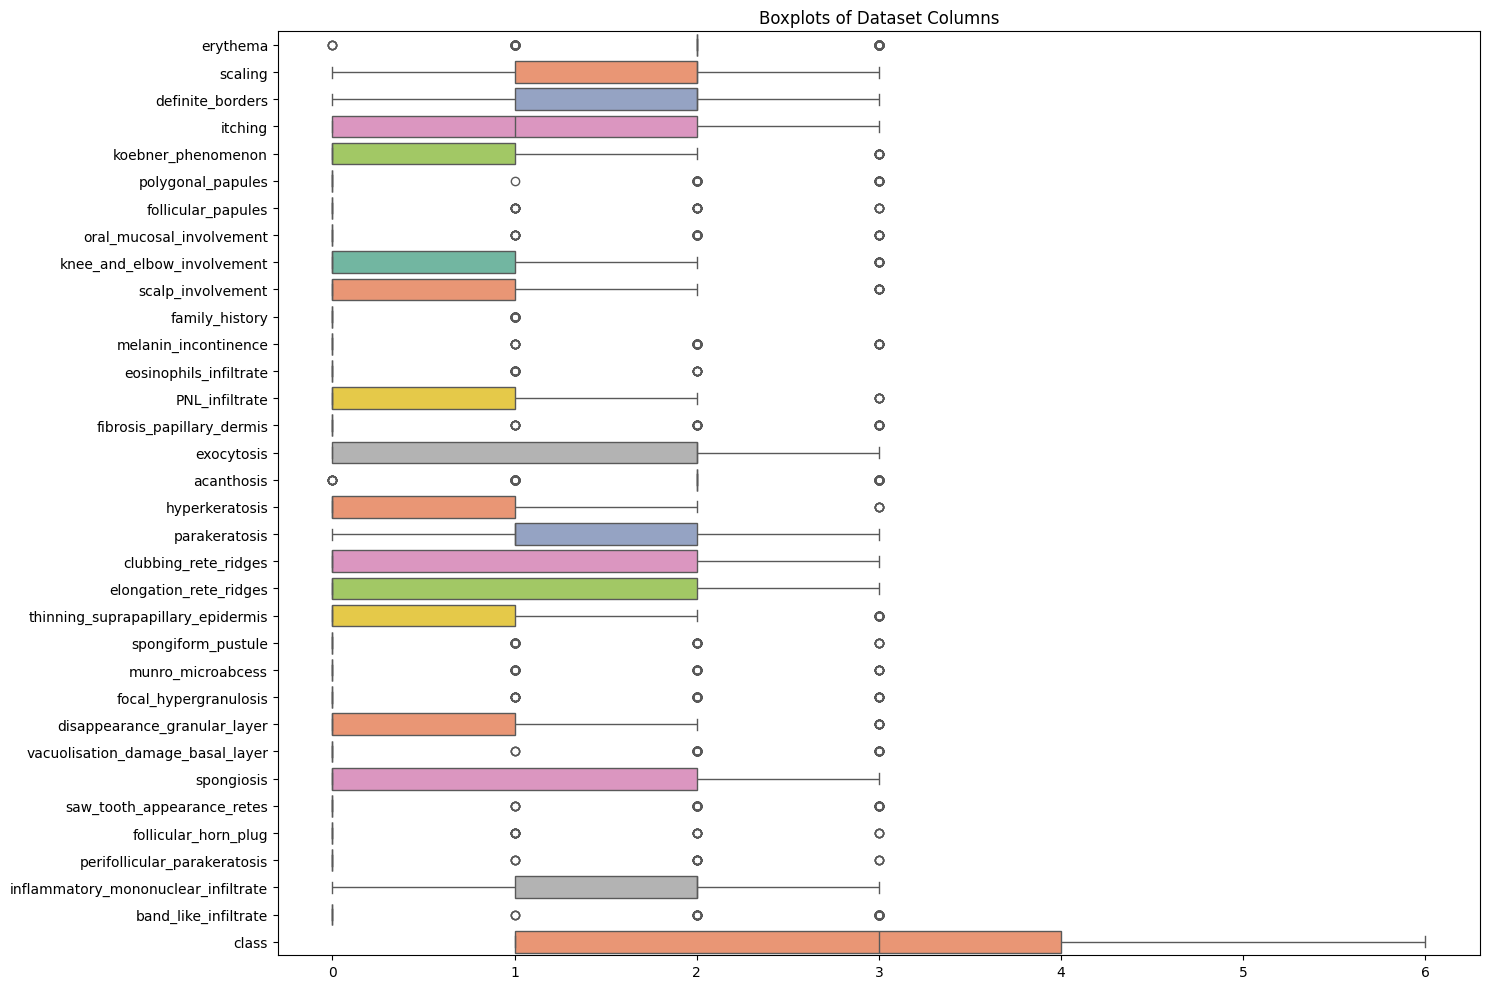

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better aesthetics

# Assuming 'data' is your DataFrame
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.boxplot(data=data, orient="h", palette="Set2")  # Use seaborn for horizontal boxplots with color palette
plt.title("Boxplots of Dataset Columns")
plt.tight_layout()  # Apply tight layout
plt.show()